# Analysis on Layoffs in the world between 2020 - 2023

In this Analysis we will extract insights about the layoffs around the world and the relation between Layoffs and various other factors.

The Dataset we are considering for the Analysis includes the following details in its columns\
**Company\
Location\
Industry\
Total Layoffs\
Percentage Layoffs\
Date\
Stage of funding\
Country\
Funds Raised**



**Some of the key areas of our Anlysis includes**
1. Pre Prosessing of the Data
1. Company Wise Analysis
2. Country Wise Analysis
3. Industry Wise Analysis
4. Variation in layoffs with time
5. Stage of the company wise Analysis
6. Analysis of Layoffs in India and United States


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr
import random
import warnings
%matplotlib inline

**<font size="3">1. Pre Processing of the Data for Analysis</font>**

In [159]:
df = pd.read_csv('./data/layoffs.csv')

In [160]:
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,N26,Berlin,Finance,71.0,0.04,2023-04-28,Series E,United States,1700.0
1,Providoor,Melbourne,Food,NaN,1.00,2023-04-28,Unknown,Australia,NaN
2,Dropbox,SF Bay Area,Other,500.0,0.16,2023-04-27,Post-IPO,United States,1700.0
3,Vroom,New York City,Transportation,120.0,0.11,2023-04-27,Post-IPO,United States,1300.0
4,Greenhouse,New York City,Recruiting,100.0,0.12,2023-04-27,Private Equity,United States,110.0


In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_laid_off,1746.0,256.022337,841.557354,3.0,38.0,80.00,180.0,12000.0
percentage_laid_off,1694.0,0.260577,0.258415,0.0,0.1,0.17,0.3,1.0
funds_raised,2297.0,814.143794,5448.104463,0.0,50.0,156.00,442.0,121900.0


In [162]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

Here the date column is a Object. We are converting it to Datetime format so that it can be worked with in a better way

In [163]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
funds_raised                  float64
dtype: object

Checking for missing Values and filing it with Zeroes for further Analysis

In [164]:
df.isna().sum()

df['total_laid_off'] = df['total_laid_off'].fillna(0)
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0)
df['stage'] = df['stage'].fillna(0)
df['funds_raised'] = df['funds_raised'].fillna(0)
df['industry'] = df['industry'].fillna(0)


**<font size="3">2. Company Wise Analysis</font>**

In [165]:
# How many unique companies are included in the dataset?
unique_companies = df['company'].nunique()
print("Number of unique companies:", unique_companies)

# What is the distribution of companies across different countries?
company_country_counts = df['country'].value_counts()
print("Distribution of companies across different locations:")
print(company_location_counts)

Number of unique companies: 2021
Distribution of companies across different locations:
country
United States     1649
India              169
Canada             108
United Kingdom      80
Brazil              76
                  ... 
Italy                1
Hungary              1
Ukraine              1
Philippines          1
Myanmar              1
Name: count, Length: 62, dtype: int64


Top 10 companies with the highest number of layoffs:
company
Amazon        27150.0
Meta          21000.0
Google        12000.0
Salesforce    10090.0
Microsoft     10000.0
Philips       10000.0
Ericsson       8500.0
Flink          8000.0
Uber           7585.0
Micron         7200.0
Name: total_laid_off, dtype: float64


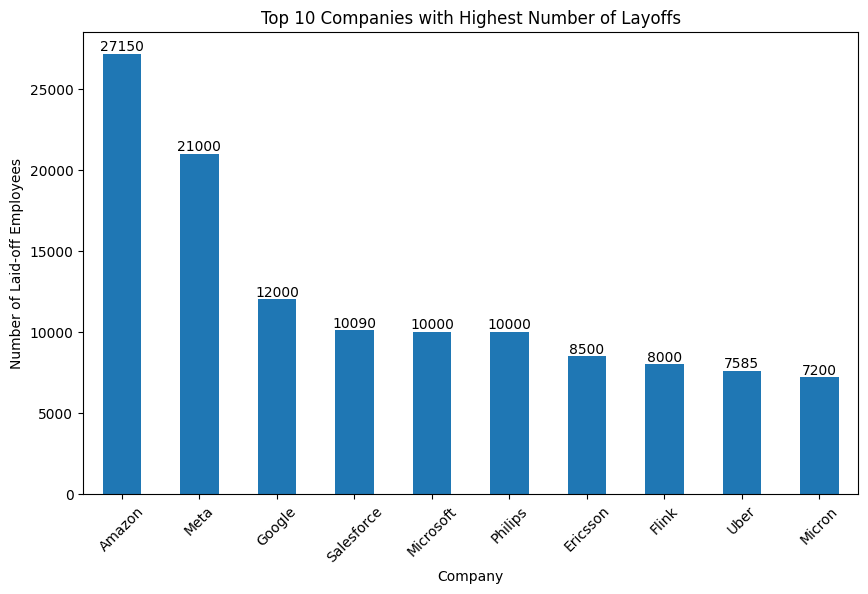

In [166]:
# Top 10 Comapnies with highest Layoffs

top_10_companies = df.groupby('company')['total_laid_off'].sum().nlargest(10)

print("Top 10 companies with the highest number of layoffs:")
print(top_10_companies)


plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Laid-off Employees')
plt.title('Top 10 Companies with Highest Number of Layoffs')
plt.xticks(rotation=45)

for i, value in enumerate(top_10_companies):
    plt.annotate(int(value), (i, value), ha='center', va='bottom')
    
plt.show()

Observation: Here we can observe that **Amazon** is the company with highest number of Layoffs followed by **Meta**

**<font size="3">3. Country Wise Analysis</font>**

Top 10 countries with the highest number of layoffs:
country
United States     301546.0
India              38639.0
Netherlands        17220.0
Germany            16845.0
Sweden             11279.0
Brazil             10391.0
United Kingdom      8968.0
Canada              6679.0
China               6105.0
Singapore           5995.0
Name: total_laid_off, dtype: float64


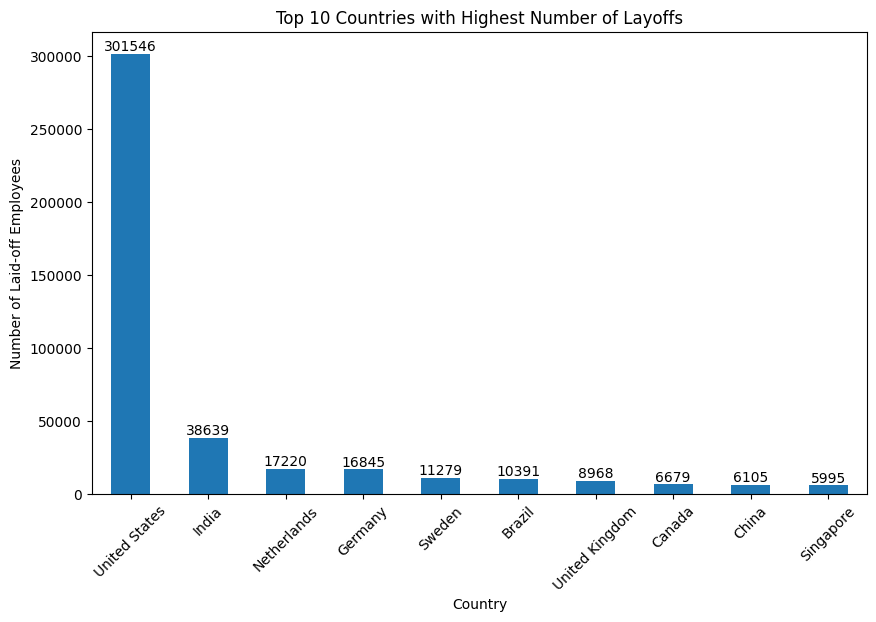

In [167]:
# Top 10 companies with respect to no of layoffs

top_10_countries = df.groupby('country')['total_laid_off'].sum().nlargest(10)

print("Top 10 countries with the highest number of layoffs:")
print(top_10_countries)

top_10_countries = df.groupby('country')['total_laid_off'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Laid-off Employees')
plt.title('Top 10 Countries with Highest Number of Layoffs')
plt.xticks(rotation=45)

for i, value in enumerate(top_10_countries):
    plt.annotate(int(value), (i, value), ha='center', va='bottom')
    
plt.show()

Observation: We can note that **United States** has contributed to the layoffs considerably higher than other countries 

**<font size="3">4. Industry Wise Analysis</font>**

Different industries represented in the dataset: ['Finance' 'Food' 'Other' 'Transportation' 'Recruiting' 'Data' 'HR'
 'Infrastructure' 'Retail' 'Consumer' 'Education' 'Media' 'Hardware'
 'Security' 'Real Estate' 'Crypto' 'Healthcare' 'Travel' 'Sales'
 'Marketing' 'Manufacturing' 'Fitness' 'Support' 0 'Logistics' 'Product'
 'Construction' 'Legal' 'Energy' 'Aerospace']
Top 10 Industries with the highest number of layoffs:
Consumer
Retail
Other
Transportation
Food
Finance
Healthcare
Hardware
Real Estate
Travel


C:\Users\admin\AppData\Local\Temp\ipykernel_4668\1191394603.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


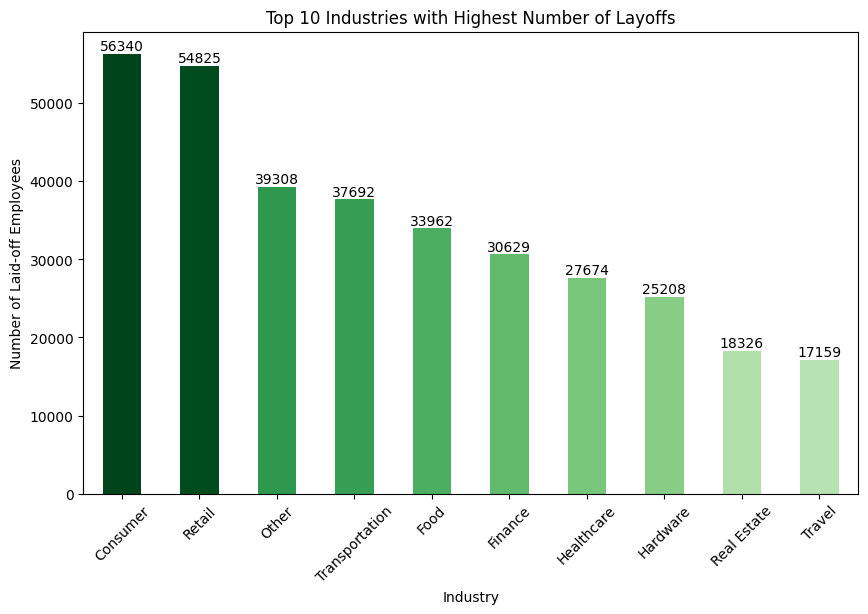

In [168]:
# What are the different industries represented in the dataset?
unique_industries = df['industry'].unique()
print("Different industries represented in the dataset:", unique_industries)

# Top 10 Industries with highest layoffs
top_10_industries = df.groupby('industry')['total_laid_off'].sum().nlargest(10).index
print("Top 10 Industries with the highest number of layoffs:")
for industry in top_10_industries:
    print(industry)

# Are there any relationships between the industry and the percentage of employees laid off?

top_10_industries = df.groupby('industry')['total_laid_off'].sum().nlargest(10)

# Define colormap
cmap = plt.cm.get_cmap('Greens')

plt.figure(figsize=(10, 6))
top_10_industries.plot(kind='bar', color=cmap(top_10_industries.values / top_10_industries.values.max()))
plt.xlabel('Industry')
plt.ylabel('Number of Laid-off Employees')
plt.title('Top 10 Industries with Highest Number of Layoffs')
plt.xticks(rotation=45)

for i, value in enumerate(top_10_industries):
    plt.annotate(int(value), (i, value), ha='center', va='bottom')
    
plt.show()

Observation: Consumer Industry followed by Retail Sector has contributed to the Layoffs the most compared to other sectors

**<font size="3">5. Variation of Layoffs over Time</font>**

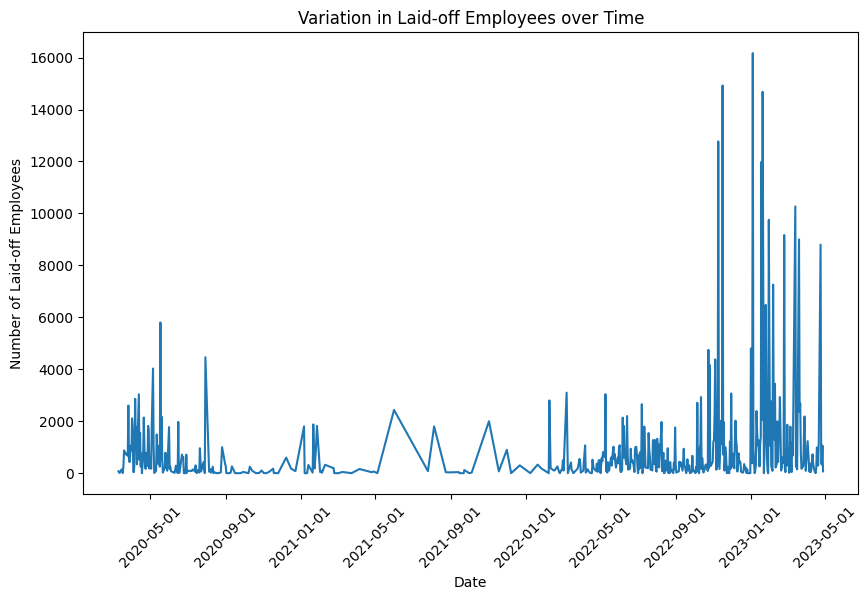

In [169]:
# How does the number of laid-off employees vary over time?

laid_off_by_date = df.groupby('date')['total_laid_off'].sum()

# Plotting the line graph
laid_off_by_date = df.groupby('date')['total_laid_off'].sum()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(laid_off_by_date.index, laid_off_by_date.values)
plt.xlabel('Date')
plt.ylabel('Number of Laid-off Employees')
plt.title('Variation in Laid-off Employees over Time')

# Set the x-axis tick positions and labels
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.show()


Observation: Between September 2022 and January 2023 the Layoffs have peaked an there is a slight reduction in layoffs compared to the period between September 2022 and January 2023. But are still higher compared to 2021, 2020 and first half of 2022

**<font size="3">6. Analysis of Layoffs in relation to the Stage of funding of the Company</font>**

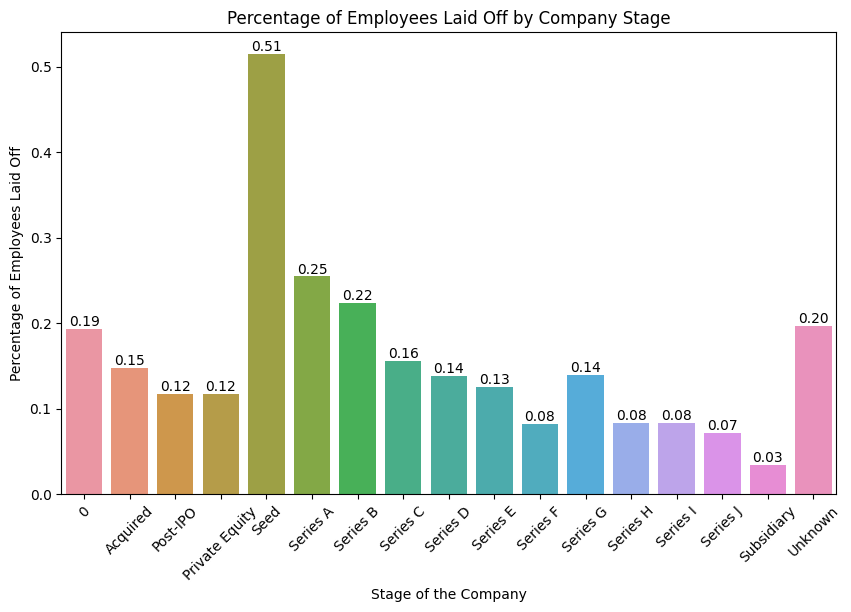

In [170]:
percentage_laid_off_by_stage = df.groupby('stage')['percentage_laid_off'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_laid_off_by_stage.reset_index(), x='stage', y='percentage_laid_off')
plt.xlabel('Stage of the Company')
plt.ylabel('Percentage of Employees Laid Off')
plt.title('Percentage of Employees Laid Off by Company Stage')
plt.xticks(rotation=45)

for i, value in enumerate(percentage_laid_off_by_stage):
    plt.annotate(f'{value:.2f}', (i, value), ha='center', va='bottom')


plt.show()

Observation: Companies with seed level funding have the highest percentage of employees laid off followed by companies with Series A Funding

In [171]:
df_India = df[df['country']== 'India']

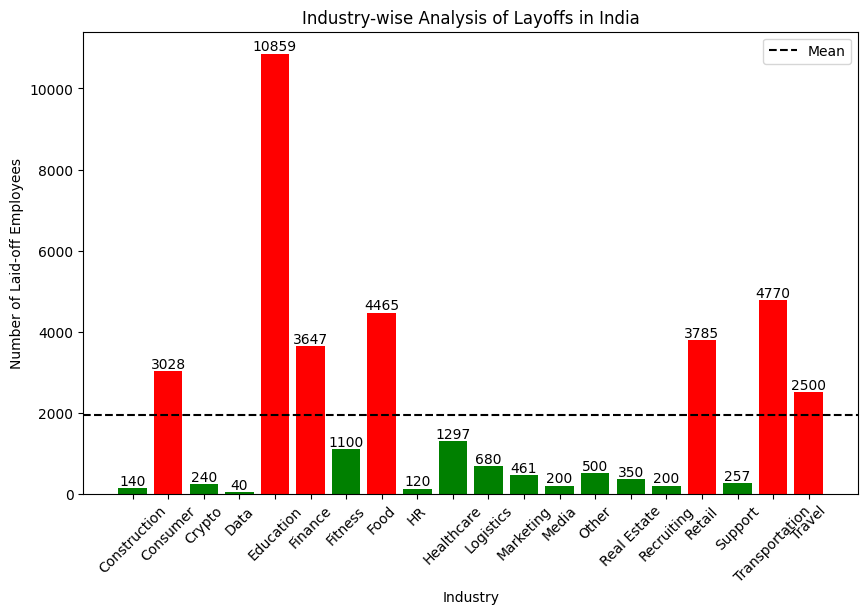

In [172]:
industry_layoffs_IN = df_India.groupby('industry')['total_laid_off'].sum()
mean_layoffs = industry_layoffs.mean()

# Plotting above mean and below mean with different colors
colors = ['Red' if value >= mean_layoffs else 'green' for value in industry_layoffs_IN]

plt.figure(figsize=(10, 6))
plt.bar(industry_layoffs_IN.index, industry_layoffs_IN, color=colors)
plt.xlabel('Industry')
plt.ylabel('Number of Laid-off Employees')
plt.title('Industry-wise Analysis of Layoffs in India')
plt.xticks(rotation=45)

for i, value in enumerate(industry_layoffs_IN):
    plt.annotate(int(value), (i, value), ha='center', va='bottom')

plt.axhline(mean_layoffs, color='black', linestyle='--', label='Mean')
plt.legend()

plt.show()



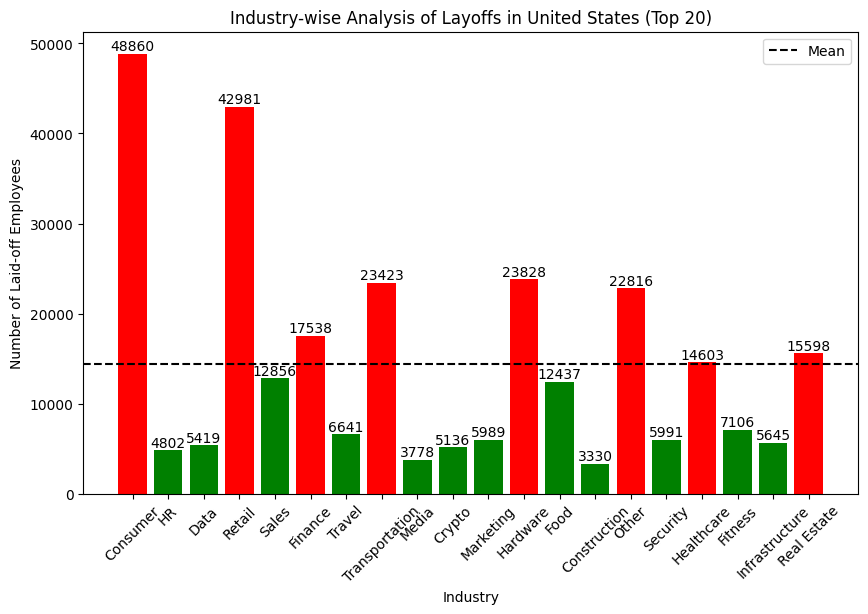

In [173]:
industry_layoffs_US = df_United_states.groupby('industry')['total_laid_off'].sum().nlargest(20)
industry_layoffs_US = industry_layoffs_US.sample(frac=1, random_state=42)  
mean_layoffs_US = industry_layoffs_US.mean()

# Plotting above mean and below mean with different colors
colors = ['Red' if value >= mean_layoffs_US else 'green' for value in industry_layoffs_US]

plt.figure(figsize=(10, 6))
plt.bar(industry_layoffs_US.index, industry_layoffs_US, color=colors)
plt.xlabel('Industry')
plt.ylabel('Number of Laid-off Employees')
plt.title('Industry-wise Analysis of Layoffs in United States (Top 20)')
plt.xticks(rotation=45)

for i, value in enumerate(industry_layoffs_US):
    plt.annotate(int(value), (i, value), ha='center', va='bottom')

plt.axhline(mean_layoffs_US, color='black', linestyle='--', label='Mean')
plt.legend()

plt.show()


Observation: In **India** the Sector with highest number of layoffs are **Education and Transportation**. 
             Where as in **United States** **Consumer Sector and Retail** Sector contribute most to the Layoffs

**<font size="5">Summary of the Analysis: </font>**
1. **Amazon** is the company with highest number of Layoffs followed by **Meta**
2. **United States** has contributed to the layoffs considerably higher than other countries 
3. Consumer Industry followed by Retail Sector has contributed to the Layoffs most compared to other sectors
4. Between September 2022 and January 2023 the Layoffs have peaked an there is a slight reduction in layoffs compared to the period between September 2022 and January 2023. But are still higher compared to 2021, 2020 and first half of 2022
4. Companies with seed level funding have the highest percentage of employees laid off followed by companies with Series A Funding
5. In **India** the Sector with highest number of layoffs are **Education and Transportation**. 
             Where as in **United States** **Consumer Sector and Retail** Sector contribute most to the Layoffs